<a href="https://colab.research.google.com/github/Saran4work/python_2/blob/main/RandomForest_WholePork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import the Standard operational packages.
import numpy as np
import pandas as pd

## Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

## Import Pre-Process Packages.
from sklearn.model_selection import train_test_split

## Import Random Forest package
from sklearn.ensemble import RandomForestRegressor

## from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay

## Import evaluate package.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
data = pd.read_csv("Main_Product_data.csv")

In [ ]:
## Split df by regions
bkk_df = data[data["Zone Manager"]=="BKK"]
east_df = data[data["Zone Manager"]=="EAST"]
upn_df = data[data["Zone Manager"]=="UPPER NORTH"]
lwn_df = data[data["Zone Manager"]=="LOWER NORTH"]
south_df = data[data["Zone Manager"]=="SOUTH"]
une_df = data[data["Zone Manager"]=="UPPER NORTHEAST"]
lne_df = data[data["Zone Manager"]=="LOWER NORTHEAST"]
west_df = data[data["Zone Manager"]=="WEST"]

Text(0.5, 0, 'Price per KG')

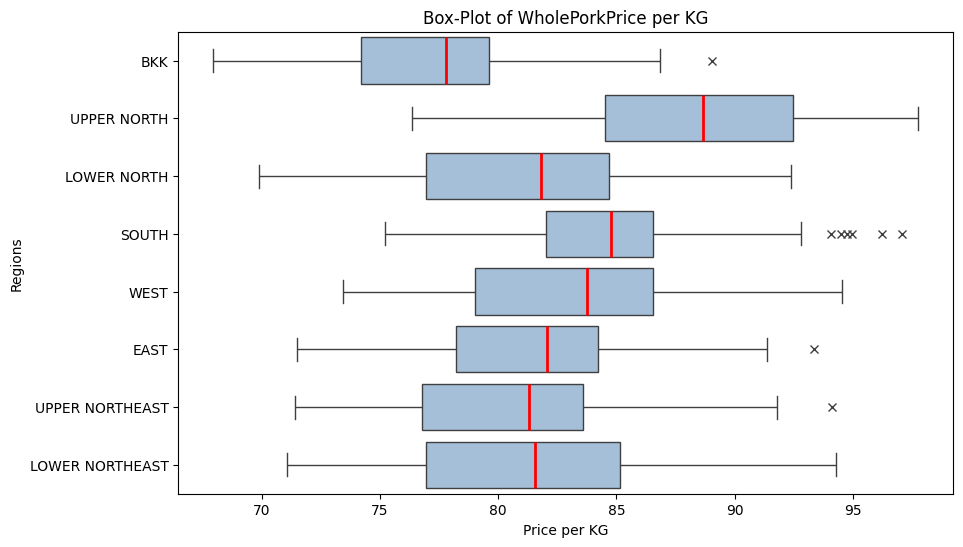

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=data, x="Price_KG_Pork_Whole", y="Zone Manager",
    notch=False, showcaps=True,
    flierprops={"marker": "x"},
     boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

plt.title("Box-Plot of WholePorkPrice per KG")
plt.ylabel('Regions')
plt.xlabel('Price per KG')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YearForWkMon                       424 non-null    int64  
 1   WeekNoMon                          424 non-null    int64  
 2   CustomerForPlan1                   424 non-null    object 
 3   Zone Manager                       424 non-null    object 
 4   Order_PlanningUnit_Chicken_BB      424 non-null    float64
 5   Order_PlanningUnit_Chicken_Other   424 non-null    float64
 6   Order_PlanningUnit_Chicken_Thighs  424 non-null    float64
 7   Order_PlanningUnit_Chicken_Whole   424 non-null    float64
 8   Order_PlanningUnit_Chicken_Wings   424 non-null    float64
 9   Order_PlanningUnit_Pork_Belly      424 non-null    float64
 10  Order_PlanningUnit_Pork_Ground     424 non-null    float64
 11  Order_PlanningUnit_Pork_Hip        424 non-null    float64

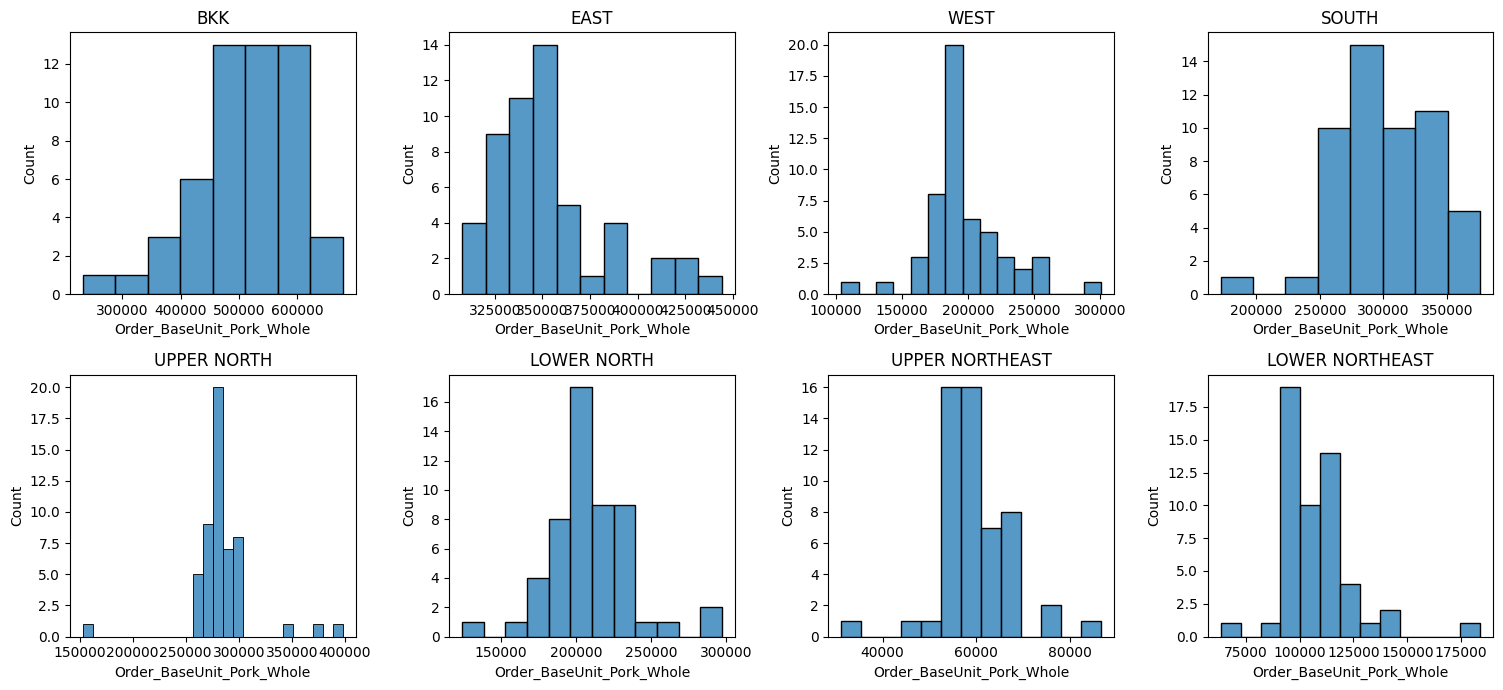

In [ ]:
## Create a 2*4 plot figure
fig, axes = plt.subplots(2,4, figsize=(15,7))

## 0,0 BKK
sns.histplot(x = bkk_df['Order_BaseUnit_Pork_Whole'],ax=axes[0,0], stat="count")
axes[0,0].set_title("BKK")

## 0,1 EAST
sns.histplot(x = east_df['Order_BaseUnit_Pork_Whole'],ax=axes[0,1])
axes[0,1].set_title("EAST")

## 0,2 WEST
sns.histplot(x = west_df['Order_BaseUnit_Pork_Whole'],ax=axes[0,2])
axes[0,2].set_title("WEST")

## 0,3 SOUTH
sns.histplot(x = south_df['Order_BaseUnit_Pork_Whole'],ax=axes[0,3])
axes[0,3].set_title("SOUTH")

## 1,0 UPPER NORTH
sns.histplot(x = upn_df['Order_BaseUnit_Pork_Whole'],ax=axes[1,0], stat="count")
axes[1,0].set_title("UPPER NORTH")

## 1,1 LOWER NORTH
sns.histplot(x = lwn_df['Order_BaseUnit_Pork_Whole'],ax=axes[1,1])
axes[1,1].set_title("LOWER NORTH")

## 1,2 UPPER NORTHEAST
sns.histplot(x = une_df['Order_BaseUnit_Pork_Whole'],ax=axes[1,2])
axes[1,2].set_title("UPPER NORTHEAST")

## 1,3 LOWER NORTHEAST
sns.histplot(x = lne_df['Order_BaseUnit_Pork_Whole'],ax=axes[1,3])
axes[1,3].set_title("LOWER NORTHEAST")

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Order BaseUnit')

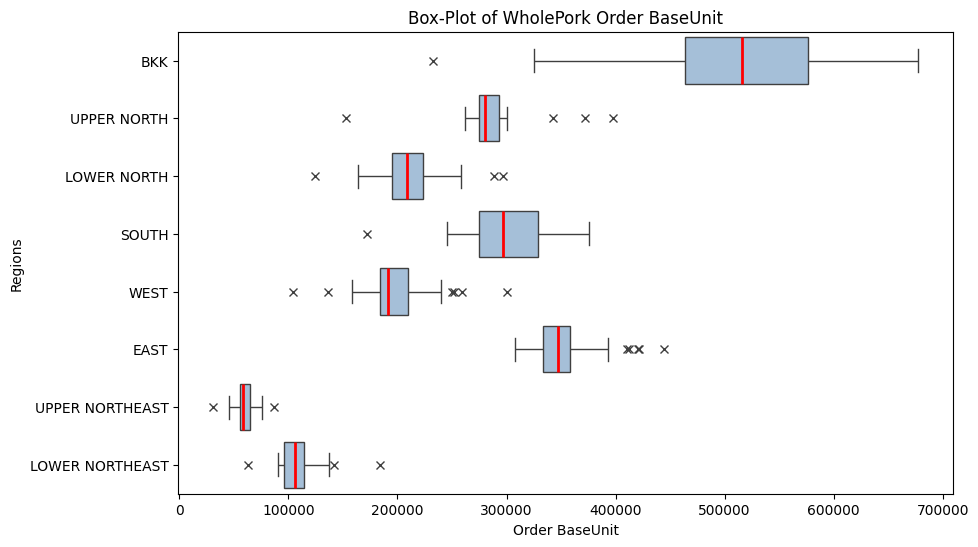

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=data, x="Order_BaseUnit_Pork_Whole", y="Zone Manager",
    notch=False, showcaps=True,
    flierprops={"marker": "x"},
     boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

plt.title("Box-Plot of WholePork Order BaseUnit")
plt.ylabel('Regions')
plt.xlabel('Order BaseUnit')

### BKK

In [ ]:
# create shift order data in new dataframe bkk_df2
bkk_df2 = bkk_df.copy()
bkk_df2['shift_order_wholepork'] = bkk_df['Order_BaseUnit_Pork_Whole'].shift(-1)
bkk_df2 = bkk_df2.reset_index()
bkk_df2 = bkk_df2.dropna()

# check na
bkk_df2.isna().sum().sum()

0

In [ ]:
# choose all features for train model
bkk_df2 = bkk_df2[['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager','Order_BaseUnit_Chicken_BB', 'Order_BaseUnit_Chicken_Other', 'Order_BaseUnit_Chicken_Thighs' , 'Order_BaseUnit_Chicken_Whole' , 'Order_BaseUnit_Chicken_Wings' , 'Order_BaseUnit_Pork_Belly' , 'Order_BaseUnit_Pork_Ground' , 'Order_BaseUnit_Pork_Hip' , 'Order_BaseUnit_Pork_Neck' , 'Order_BaseUnit_Pork_Rib',  'Order_BaseUnit_Pork_Shoulder' , 'Order_BaseUnit_Pork_Sirloin', 'Order_BaseUnit_Pork_Whole', 'Price_KG_Chicken_BB', 'Price_KG_Chicken_Other' , 'Price_KG_Chicken_Thighs' , 'Price_KG_Chicken_Whole' , 'Price_KG_Chicken_Wings' , 'Price_KG_Pork_Belly', 'Price_KG_Pork_Ground' , 'Price_KG_Pork_Hip' , 'Price_KG_Pork_Neck' , 'Price_KG_Pork_Rib' , 'Price_KG_Pork_Shoulder' , 'Price_KG_Pork_Sirloin' , 'Price_KG_Pork_Whole']]
X = bkk_df2.drop(['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager'],axis=1)
y = bkk_df2['shift_order_wholepork']

In [ ]:
### Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36, 26), (36,), (16, 26), (16,))

In [ ]:
features = X_train.columns
#est = RandomForestRegressor(n_estimators = 10,random_state=44)
bkk = RandomForestRegressor(random_state=44)
bkk.fit(X_train, y_train)

RandomForestRegressor(random_state=44)

In [ ]:
# function for evaluate model
def results(model, test_features, test_lables):
    # from sklearn.metrics import r2_score
    r_sq = r2_score(test_lables, model.predict(test_features))
    mse = mean_squared_error(test_lables,model.predict(test_features))
    mae = mean_absolute_error(test_lables,model.predict(test_features))
    mape = mean_absolute_percentage_error(test_lables,model.predict(test_features))
    predictions = model.predict(test_features)
    errors = abs(predictions - test_lables)
    mape = 100 * np.mean(errors/test_lables)
    accuracy = 100 - mape
    ## print results
    print('Model Performance')
    print('Average Error: {:0.4f} '.format(np.mean(errors)))
    print('R-square = {:0.2f}'.format(r_sq))
    print('MSE = {:0.4f}'.format(mse))
    print('MAPE = {:0.4f}'.format(mape))
    print('Accuracy = {:0.2f}%'.format(accuracy))


    return accuracy


In [ ]:
# result of random forest model
base_accuracy = results( bkk, X_test, y_test)

Model Performance
Average Error: 44727.0893 
R-square = 0.20
MSE = 2888171858.5018
MAPE = 9.0683
Accuracy = 90.93%


In [ ]:
## Random Hyperparameter Grid

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 30)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[int(x) for x in np.linspace(1, 25, num = 25)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 25, num = 25)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 15, num = 15)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
## RandomizedSearchCV
%%time
rf_cv = RandomizedSearchCV(estimator = bkk,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

CPU times: user 3.71 s, sys: 537 ms, total: 4.24 s
Wall time: 3min 42s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15],
                                        'n_estimators': [10, 44, 78, 112, 146,
                                                         180, 214, 248, 283,
                                                         317, 351, 385, 419,
                                                         453, 487, 522, 556,
                                                         590, 624, 658, 692,
                                                         726, 761, 795, 829,
                                                         863, 897, 931, 965,
                                                         1000]},
                   random_state=44, verbose=100)

In [ ]:
# rf round 2
rf_cv.best_params_

{'n_estimators': 624,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 2,
 'max_depth': 6,
 'bootstrap': False}

In [ ]:
## random forest with RandomizedSearchCV
random_grid_accuracy = results(rf_cv, X_test, y_test)

Model Performance
Average Error: 38232.4726 
R-square = 0.40
MSE = 2156896793.4138
MAPE = 7.9801
Accuracy = 92.02%


In [ ]:
# Grid Search with Cross Validation

%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [False],
    'max_depth': [6,5],
    'max_features': [2,3],
    'min_samples_leaf': [6,5],
    'min_samples_split': [3,4],
    'n_estimators': [640,650,660]
}

# Create a based model
bkk = RandomForestRegressor(random_state=44)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = bkk, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)

CPU times: user 100 µs, sys: 11 µs, total: 111 µs
Wall time: 118 µs


In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 2.3 s, sys: 275 ms, total: 2.58 s
Wall time: 2min 13s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [6, 5],
                         'max_features': [2, 3], 'min_samples_leaf': [6, 5],
                         'min_samples_split': [3, 4],
                         'n_estimators': [640, 650, 660]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 650}

In [ ]:
grid_search_accuracy = results(grid_search, X_test, y_test)

Model Performance
Average Error: 37885.9693 
R-square = 0.39
MSE = 2193958429.4079
MAPE = 7.9045
Accuracy = 92.10%


In [ ]:
## % Improvement
print("Random Grid")
print('Improvement of {:0.2f}%.'.format( 100 * (random_grid_accuracy - base_accuracy) / base_accuracy))
print("    ")
print("Grid Search")
print('Improvement of {:0.2f}%.'.format( 100 * (grid_search_accuracy - base_accuracy) / base_accuracy))

Random Grid
Improvement of 1.20%.
    
Grid Search
Improvement of 1.28%.


In [ ]:
## Create function for save result to tablt
def model_results(model_name, model, test_features, test_lables):

    predictions = model.predict(test_features)
    errors = abs(predictions - test_lables)
    mape = 100 * np.mean(errors/test_lables)
    accuracy = '{:0.2f}%'.format(100 - mape)
    # from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    # mean_absolute_percentage_error
    r_sq = r2_score(test_lables, model.predict(test_features))
    mse = mean_squared_error(test_lables,model.predict(test_features))
    mae = mean_absolute_error(test_lables,model.predict(test_features))
    mape = mean_absolute_percentage_error(test_lables,model.predict(test_features))


    ## pd.DataFrame
    table = pd.DataFrame({'Model': [model_name],
                          'Accuracy': [accuracy],
                          'Average Error': ['{:0.4f}'.format(np.mean(errors))],
                          'R-Square': ['{:0.4f}'.format(r_sq)],
                          'MSE' : [mse],
                          'MAE' : ['{:0.4f}'.format(mae)],
                          'MAPE' : ['{:0.4f}'.format(mape)]
                         }
                        )

    return table


In [ ]:
bkk_result = model_results("RF_CV_BKK", grid_search, X_test, y_test)
bkk_result

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_BKK,92.10%,37885.9693,0.3946,2.193958e+09,37885.9693,0.0790


### EAST

In [ ]:
# create shift order data in new dataframe east_df2
east_df2 = east_df.copy()
east_df2['shift_order_wholepork'] = east_df['Order_BaseUnit_Pork_Whole'].shift(-1)
east_df2 = east_df2.reset_index()
east_df2 = east_df2.dropna()

# check na
east_df2.isna().sum().sum()

0

In [ ]:
# choose all features for train model
east_df2 = east_df2[['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager','Order_BaseUnit_Chicken_BB', 'Order_BaseUnit_Chicken_Other', 'Order_BaseUnit_Chicken_Thighs' , 'Order_BaseUnit_Chicken_Whole' , 'Order_BaseUnit_Chicken_Wings' , 'Order_BaseUnit_Pork_Belly' , 'Order_BaseUnit_Pork_Ground' , 'Order_BaseUnit_Pork_Hip' , 'Order_BaseUnit_Pork_Neck' , 'Order_BaseUnit_Pork_Rib',  'Order_BaseUnit_Pork_Shoulder' , 'Order_BaseUnit_Pork_Sirloin', 'Order_BaseUnit_Pork_Whole', 'Price_KG_Chicken_BB', 'Price_KG_Chicken_Other' , 'Price_KG_Chicken_Thighs' , 'Price_KG_Chicken_Whole' , 'Price_KG_Chicken_Wings' , 'Price_KG_Pork_Belly', 'Price_KG_Pork_Ground' , 'Price_KG_Pork_Hip' , 'Price_KG_Pork_Neck' , 'Price_KG_Pork_Rib' , 'Price_KG_Pork_Shoulder' , 'Price_KG_Pork_Sirloin' , 'Price_KG_Pork_Whole']]
X_east = east_df2.drop(['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager'],axis=1)
y_east = east_df2['shift_order_wholepork']

In [ ]:
### Train-Test Split
from sklearn.model_selection import train_test_split

X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(X_east, y_east, test_size=0.3, random_state=44)

In [ ]:
features = X_train_east.columns
#est = RandomForestRegressor(n_estimators = 10,random_state=44)
east = RandomForestRegressor(random_state=44)
east.fit(X_train_east, y_train_east)

RandomForestRegressor(random_state=44)

In [ ]:
# result of random forest model
base_accuracy_east = results( east, X_test_east, y_test_east)

Model Performance
Average Error: 18141.8869 
R-square = 0.31
MSE = 565738782.5215
MAPE = 5.0231
Accuracy = 94.98%


In [ ]:
## Random Hyperparameter Grid
%%time
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 30)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[int(x) for x in np.linspace(1, 25, num = 25)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 25, num = 25)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 15, num = 15)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid_east = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## RandomizedSearchCV
rf_cv_east = RandomizedSearchCV(estimator = east,
                               param_distributions = random_grid_east,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
rf_cv_east.fit(X_train_east, y_train_east)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 3.09 s, sys: 458 ms, total: 3.55 s
Wall time: 3min 32s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15],
                                        'n_estimators': [10, 44, 78, 112, 146,
                                                         180, 214, 248, 283,
                                                         317, 351, 385, 419,
                                                         453, 487, 522, 556,
                                                         590, 624, 658, 692,
                                                         726, 761, 795, 829,
                                                         863, 897, 931, 965,
                                                         1000]},
                   random_state=44, verbose=100)

In [ ]:
rf_cv_east.best_params_

{'n_estimators': 44,
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_features': 15,
 'max_depth': 11,
 'bootstrap': True}

In [ ]:
random_grid_accuracy_east = results(rf_cv_east, X_test_east, y_test_east)

Model Performance
Average Error: 17714.5062 
R-square = 0.29
MSE = 577354882.2118
MAPE = 4.9107
Accuracy = 95.09%


In [ ]:
# Grid Search with Cross Validation

%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid_east = {
    'bootstrap': [True],
    'max_depth': [11,13],
    'max_features': [15,16,17],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [13,14,15],
    'n_estimators': [40,45,50]
}

# Create a based model
east = RandomForestRegressor(random_state=44)
# Instantiate the grid search model
grid_search_east = GridSearchCV(estimator = east, param_grid = param_grid_east,
                          cv = 5, n_jobs = -1, verbose = 2)

CPU times: user 79 µs, sys: 9 µs, total: 88 µs
Wall time: 93.2 µs


In [ ]:
%%time
grid_search_east.fit(X_train_east, y_train_east)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
CPU times: user 1.71 s, sys: 123 ms, total: 1.84 s
Wall time: 52.4 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [11, 13],
                         'max_features': [15, 16, 17],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [13, 14, 15],
                         'n_estimators': [40, 45, 50]},
             verbose=2)

In [ ]:
grid_search_east.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 16,
 'min_samples_leaf': 4,
 'min_samples_split': 13,
 'n_estimators': 40}

In [ ]:
grid_search_accuracy_east = results(grid_search_east, X_test_east, y_test_east)

Model Performance
Average Error: 17488.6769 
R-square = 0.30
MSE = 573602978.6936
MAPE = 4.8510
Accuracy = 95.15%


In [ ]:
## % Improvement
print("Random Grid")
print('Improvement of {:0.2f}%.'.format( 100 * (random_grid_accuracy_east - base_accuracy_east) / base_accuracy_east))
print("    ")
print("Grid Search")
print('Improvement of {:0.2f}%.'.format( 100 * (grid_search_accuracy_east - base_accuracy_east) / base_accuracy_east))

Random Grid
Improvement of 0.12%.
    
Grid Search
Improvement of 0.18%.


In [ ]:
east_result = model_results("RF_CV_EAST", grid_search_east, X_test_east, y_test_east)
east_result

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_EAST,95.15%,17488.6769,0.2992,5.736030e+08,17488.6769,0.0485


In [ ]:
result_table = pd.concat([bkk_result, east_result], axis=0)
result_table

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_BKK,92.10%,37885.9693,0.3946,2.193958e+09,37885.9693,0.0790
0,RF_CV_EAST,95.15%,17488.6769,0.2992,5.736030e+08,17488.6769,0.0485


### WEST

In [ ]:
# create shift order data in new dataframe west_df2
west_df2 = west_df.copy()
west_df2['shift_order_wholepork'] = west_df['Order_BaseUnit_Pork_Whole'].shift(-1)
west_df2 = west_df2.reset_index()
west_df2 = west_df2.dropna()

# check na
west_df2.isna().sum().sum()

0

In [ ]:
# choose all features for train model
west_df2 = west_df2[['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager','Order_BaseUnit_Chicken_BB', 'Order_BaseUnit_Chicken_Other', 'Order_BaseUnit_Chicken_Thighs' , 'Order_BaseUnit_Chicken_Whole' , 'Order_BaseUnit_Chicken_Wings' , 'Order_BaseUnit_Pork_Belly' , 'Order_BaseUnit_Pork_Ground' , 'Order_BaseUnit_Pork_Hip' , 'Order_BaseUnit_Pork_Neck' , 'Order_BaseUnit_Pork_Rib',  'Order_BaseUnit_Pork_Shoulder' , 'Order_BaseUnit_Pork_Sirloin', 'Order_BaseUnit_Pork_Whole', 'Price_KG_Chicken_BB', 'Price_KG_Chicken_Other' , 'Price_KG_Chicken_Thighs' , 'Price_KG_Chicken_Whole' , 'Price_KG_Chicken_Wings' , 'Price_KG_Pork_Belly', 'Price_KG_Pork_Ground' , 'Price_KG_Pork_Hip' , 'Price_KG_Pork_Neck' , 'Price_KG_Pork_Rib' , 'Price_KG_Pork_Shoulder' , 'Price_KG_Pork_Sirloin' , 'Price_KG_Pork_Whole']]
X_west = west_df2.drop(['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager'],axis=1)
y_west = west_df2['shift_order_wholepork']

In [ ]:
### Train-Test Split
from sklearn.model_selection import train_test_split

X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(X_west, y_west, test_size=0.3, random_state=44)

In [ ]:
features = X_train_west.columns
#west = RandomForestRegressor(random_state=44)
west = RandomForestRegressor(random_state=44)
west.fit(X_train_west, y_train_west)

RandomForestRegressor(random_state=44)

In [ ]:
# result of random forest model
base_accuracy_west = results( west, X_test_west, y_test_west)

Model Performance
Average Error: 20273.7883 
R-square = 0.05
MSE = 631475826.5546
MAPE = 10.4129
Accuracy = 89.59%


In [ ]:
## Random Hyperparameter Grid
%%time
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[int(x) for x in np.linspace(1, 25, num = 25)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 25, num = 25)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 24, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 24, num = 20)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid_west = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## RandomizedSearchCV
rf_cv_west = RandomizedSearchCV(estimator = west,
                               param_distributions = random_grid_west,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
rf_cv_west.fit(X_train_west, y_train_west)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 890 ms, sys: 76.7 ms, total: 966 ms
Wall time: 28.5 s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 7,
                                                             8, 9, 10, 11, 13,
                                                             14, 15, 16, 17, 19,
                                                             20, 21, 22, 24],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              8, 9, 10, 11, 13,
                                                              14, 15, 16, 17,
                                                              19, 20, 21, 22,
                                                              24],
                                        'n_estimators': [1, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   random_state=44, verbose=100)

In [ ]:
rf_cv_west.best_params_

{'n_estimators': 23,
 'min_samples_split': 20,
 'min_samples_leaf': 11,
 'max_features': 11,
 'max_depth': 14,
 'bootstrap': True}

In [ ]:
random_grid_accuracy_west = results(rf_cv_west, X_test_west, y_test_west)

Model Performance
Average Error: 18200.5834 
R-square = -0.04
MSE = 686663103.8453
MAPE = 9.4858
Accuracy = 90.51%


In [ ]:
# Grid Search with Cross Validation

%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid_west = {
    'bootstrap': [True],
    'max_depth': [14,15],
    'max_features': [10,11],
    'min_samples_leaf': [11,9,10],
    'min_samples_split': [21,22],
    'n_estimators': [20,21,19]
}

# Create a based model
west = RandomForestRegressor(random_state=44)
# Instantiate the grid search model
grid_search_west = GridSearchCV(estimator = west, param_grid = param_grid_west,
                          cv = 5, n_jobs = -1, verbose = 2)

CPU times: user 84 µs, sys: 10 µs, total: 94 µs
Wall time: 99.2 µs


In [ ]:
%%time
grid_search_west.fit(X_train_west, y_train_west)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 509 ms, sys: 32.5 ms, total: 541 ms
Wall time: 10.2 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [14, 15],
                         'max_features': [10, 11],
                         'min_samples_leaf': [11, 9, 10],
                         'min_samples_split': [21, 22],
                         'n_estimators': [20, 21, 19]},
             verbose=2)

In [ ]:
grid_search_west.best_params_
# 14 10 9 22 19

{'bootstrap': True,
 'max_depth': 14,
 'max_features': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 22,
 'n_estimators': 19}

In [ ]:
grid_search_accuracy_west = results(grid_search_west, X_test_west, y_test_west)

Model Performance
Average Error: 17828.5619 
R-square = -0.03
MSE = 685216071.0440
MAPE = 9.2907
Accuracy = 90.71%


In [ ]:
## % Improvement
print("Random Grid")
print('Improvement of {:0.2f}%.'.format( 100 * (random_grid_accuracy_west - base_accuracy_west) / base_accuracy_west))
print("    ")
print("Grid Search")
print('Improvement of {:0.2f}%.'.format( 100 * (grid_search_accuracy_west - base_accuracy_west) / base_accuracy_west))

Random Grid
Improvement of 1.03%.
    
Grid Search
Improvement of 1.25%.


In [ ]:
west_result = model_results("RF_CV_WEST", grid_search_west, X_test_west, y_test_west)
west_result

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_WEST,90.71%,17828.5619,-0.0342,6.852161e+08,17828.5619,0.0929


In [ ]:
result_table = pd.concat([result_table, west_result], axis=0)
result_table

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_BKK,92.10%,37885.9693,0.3946,2.193958e+09,37885.9693,0.0790
0,RF_CV_EAST,95.15%,17488.6769,0.2992,5.736030e+08,17488.6769,0.0485
0,RF_CV_WEST,90.71%,17828.5619,-0.0342,6.852161e+08,17828.5619,0.0929


### SOUTH

In [ ]:
# create shift order data in new dataframe south_df2
south_df2 = south_df.copy()
south_df2['shift_order_wholepork'] = south_df['Order_BaseUnit_Pork_Whole'].shift(-1)
south_df2 = south_df2.reset_index()
south_df2 = south_df2.dropna()

# check na
south_df2.isna().sum().sum()

0

In [ ]:
# choose all features for train model
south_df2 = south_df2[['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager','Order_BaseUnit_Chicken_BB', 'Order_BaseUnit_Chicken_Other', 'Order_BaseUnit_Chicken_Thighs' , 'Order_BaseUnit_Chicken_Whole' , 'Order_BaseUnit_Chicken_Wings' , 'Order_BaseUnit_Pork_Belly' , 'Order_BaseUnit_Pork_Ground' , 'Order_BaseUnit_Pork_Hip' , 'Order_BaseUnit_Pork_Neck' , 'Order_BaseUnit_Pork_Rib',  'Order_BaseUnit_Pork_Shoulder' , 'Order_BaseUnit_Pork_Sirloin', 'Order_BaseUnit_Pork_Whole', 'Price_KG_Chicken_BB', 'Price_KG_Chicken_Other' , 'Price_KG_Chicken_Thighs' , 'Price_KG_Chicken_Whole' , 'Price_KG_Chicken_Wings' , 'Price_KG_Pork_Belly', 'Price_KG_Pork_Ground' , 'Price_KG_Pork_Hip' , 'Price_KG_Pork_Neck' , 'Price_KG_Pork_Rib' , 'Price_KG_Pork_Shoulder' , 'Price_KG_Pork_Sirloin' , 'Price_KG_Pork_Whole']]
X_south = south_df2.drop(['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager'],axis=1)
y_south = south_df2['shift_order_wholepork']

In [ ]:
### Train-Test Split
from sklearn.model_selection import train_test_split

X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X_south, y_south, test_size=0.3, random_state=44)

In [ ]:
features = X_train_south.columns
#south = RandomForestRegressor(random_state=44)
south = RandomForestRegressor(random_state=44)
south.fit(X_train_south, y_train_south)

RandomForestRegressor(random_state=44)

In [ ]:
base_accuracy_south = results(south, X_test_south, y_test_south)

Model Performance
Average Error: 26360.8666 
R-square = -0.03
MSE = 1271469749.8648
MAPE = 8.3712
Accuracy = 91.63%


In [ ]:
## Random Hyperparameter Grid
%%time
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 1000, num = 4)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[int(x) for x in np.linspace(1, 25, num = 25)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 25, num = 25)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 24, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 24, num = 20)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid_south = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## RandomizedSearchCV
rf_cv_south = RandomizedSearchCV(estimator = south,
                               param_distributions = random_grid_south,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
rf_cv_south.fit(X_train_south, y_train_south)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

CPU times: user 5.8 s, sys: 856 ms, total: 6.66 s
Wall time: 6min 47s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 7,
                                                             8, 9, 10, 11, 13,
                                                             14, 15, 16, 17, 19,
                                                             20, 21, 22, 24],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              8, 9, 10, 11, 13,
                                                              14, 15, 16, 17,
                                                              19, 20, 21, 22,
                                                              24],
                                        'n_estimators': [800, 866, 933, 1000]},
                   random_state=44, verbose=100)

In [ ]:
rf_cv_south.best_params_
# 91.71% 1000 3 1 3 8 True
# 91.72% 800 8 4 6 21 True

{'n_estimators': 800,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 6,
 'max_depth': 21,
 'bootstrap': True}

In [ ]:
random_grid_accuracy_south = results(rf_cv_south, X_test_south, y_test_south)

Model Performance
Average Error: 25797.3004 
R-square = 0.15
MSE = 1039659431.5685
MAPE = 8.2758
Accuracy = 91.72%


In [ ]:
# Grid Search with Cross Validation

%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid_south = {
    'bootstrap': [True],
    'max_depth': [21],
    'max_features': [6],
    'min_samples_leaf': [4],
    'min_samples_split': [8],
    'n_estimators': [650]
}

# Create a based model
south = RandomForestRegressor(random_state=44)
# Instantiate the grid search model
grid_search_south = GridSearchCV(estimator = south, param_grid = param_grid_south,
                          cv = 5, n_jobs = -1, verbose = 2)

CPU times: user 94 µs, sys: 10 µs, total: 104 µs
Wall time: 119 µs


In [ ]:
%%time
grid_search_south.fit(X_train_south, y_train_south)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 810 ms, sys: 9.04 ms, total: 819 ms
Wall time: 4.64 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [21],
                         'max_features': [6], 'min_samples_leaf': [4],
                         'min_samples_split': [8], 'n_estimators': [650]},
             verbose=2)

In [ ]:
grid_search_south.best_params_
# 91.78% True 21 6 4 8 650

{'bootstrap': True,
 'max_depth': 21,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 650}

In [ ]:
grid_search_accuracy_south = results(grid_search_south, X_test_south, y_test_south)

Model Performance
Average Error: 25629.2177 
R-square = 0.16
MSE = 1037491359.5405
MAPE = 8.2194
Accuracy = 91.78%


In [ ]:
## % Improvement
print("Random Grid")
print('Improvement of {:0.2f}%.'.format( 100 * (random_grid_accuracy_south - base_accuracy_south) / base_accuracy_south))
print("    ")
print("Grid Search")
print('Improvement of {:0.2f}%.'.format( 100 * (grid_search_accuracy_south - base_accuracy_south) / base_accuracy_south))
print("    ")
print('Final Model Accuracy')
print('{:0.4f} %'.format(grid_search_accuracy_south))

Random Grid
Improvement of 0.10%.
    
Grid Search
Improvement of 0.17%.
    
Final Model Accuracy
91.7806 %


In [ ]:
south_result = model_results("RF_CV_SOUTH", grid_search_south, X_test_south, y_test_south)
south_result

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_SOUTH,91.78%,25629.2177,0.1566,1.037491e+09,25629.2177,0.0822


In [ ]:
result_table = pd.concat([result_table, south_result], axis=0)

In [ ]:
result_table

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_BKK,92.10%,37885.9693,0.3946,2.193958e+09,37885.9693,0.0790
0,RF_CV_EAST,95.15%,17488.6769,0.2992,5.736030e+08,17488.6769,0.0485
0,RF_CV_WEST,90.71%,17828.5619,-0.0342,6.852161e+08,17828.5619,0.0929
0,RF_CV_SOUTH,91.78%,25629.2177,0.1566,1.037491e+09,25629.2177,0.0822


### UPPER NORTHEAST

In [ ]:
# create shift order data in new dataframe upper une_df2
une_df2 = une_df.copy()
une_df2['shift_order_wholepork'] = une_df['Order_BaseUnit_Pork_Whole'].shift(-1)
une_df2 = une_df2.reset_index()
une_df2 = une_df2.dropna()

# check na
une_df2.isna().sum().sum()

0

In [ ]:
# choose all features for train model
une_df2 = une_df2[['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager','Order_BaseUnit_Chicken_BB', 'Order_BaseUnit_Chicken_Other', 'Order_BaseUnit_Chicken_Thighs' , 'Order_BaseUnit_Chicken_Whole' , 'Order_BaseUnit_Chicken_Wings' , 'Order_BaseUnit_Pork_Belly' , 'Order_BaseUnit_Pork_Ground' , 'Order_BaseUnit_Pork_Hip' , 'Order_BaseUnit_Pork_Neck' , 'Order_BaseUnit_Pork_Rib',  'Order_BaseUnit_Pork_Shoulder' , 'Order_BaseUnit_Pork_Sirloin', 'Order_BaseUnit_Pork_Whole', 'Price_KG_Chicken_BB', 'Price_KG_Chicken_Other' , 'Price_KG_Chicken_Thighs' , 'Price_KG_Chicken_Whole' , 'Price_KG_Chicken_Wings' , 'Price_KG_Pork_Belly', 'Price_KG_Pork_Ground' , 'Price_KG_Pork_Hip' , 'Price_KG_Pork_Neck' , 'Price_KG_Pork_Rib' , 'Price_KG_Pork_Shoulder' , 'Price_KG_Pork_Sirloin' , 'Price_KG_Pork_Whole']]
X_une = une_df2.drop(['shift_order_wholepork','index','YearForWkMon','WeekNoMon','CustomerForPlan1','Zone Manager'],axis=1)
y_une = une_df2['shift_order_wholepork']

In [ ]:
### Train-Test Split
from sklearn.model_selection import train_test_split

X_train_une, X_test_une, y_train_une, y_test_une = train_test_split(X_une, y_une, test_size=0.3, random_state=44)

In [ ]:
features = X_train_une.columns
#une = RandomForestRegressor(random_state=44)
une = RandomForestRegressor(random_state=44)
une.fit(X_train_une, y_train_une)

RandomForestRegressor(random_state=44)

In [ ]:
base_accuracy_une = results(une, X_test_une, y_test_une)

Model Performance
Average Error: 6065.2378 
R-square = -0.16
MSE = 84733243.5470
MAPE = 9.6655
Accuracy = 90.33%


In [ ]:
## Random Hyperparameter Grid
%%time
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 700, num = 20)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[int(x) for x in np.linspace(1, 25, num = 25)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 25, num = 25)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 24, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 24, num = 20)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid_une = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## RandomizedSearchCV
rf_cv_une = RandomizedSearchCV(estimator = une,
                               param_distributions = random_grid_une,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
rf_cv_une.fit(X_train_une, y_train_une)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 2.6 s, sys: 340 ms, total: 2.94 s
Wall time: 2min 23s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 7,
                                                             8, 9, 10, 11, 13,
                                                             14, 15, 16, 17, 19,
                                                             20, 21, 22, 24],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              8, 9, 10, 11, 13,
                                                              14, 15, 16, 17,
                                                              19, 20, 21, 22,
                                                              24],
                                        'n_estimators': [1, 37, 74, 111, 148,
                                                         184, 221, 258, 295,
                                                         332, 368, 405, 442,
                                                         479, 516, 552, 589,
                                                         626, 663, 700]},
                   random_state=44, verbose=100)

In [ ]:
rf_cv_une.best_params_
#90.37% 211 20 8 15 12 False
#90.46%  74 20 8 15 12 False
#90.65%  42 20 8 15 12 False

{'n_estimators': 148,
 'min_samples_split': 20,
 'min_samples_leaf': 8,
 'max_features': 15,
 'max_depth': 12,
 'bootstrap': False}

In [ ]:
random_grid_accuracy_une = results(rf_cv_une, X_test_une, y_test_une)

Model Performance
Average Error: 5989.0378 
R-square = -0.07
MSE = 77821081.4942
MAPE = 9.5978
Accuracy = 90.40%


In [ ]:
# Grid Search with Cross Validation

%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid_une = {
    'bootstrap': [True, False],
    'max_depth': [15],
    'max_features': [15],
    'min_samples_leaf': [8],
    'min_samples_split': [20],
    'n_estimators': [42]
}

# Create a based model
une = RandomForestRegressor(random_state=44)
# Instantiate the grid search model
grid_search_une = GridSearchCV(estimator = une, param_grid = param_grid_une,
                          cv = 5, n_jobs = -1, verbose = 2)

CPU times: user 84 µs, sys: 9 µs, total: 93 µs
Wall time: 97.5 µs


In [ ]:
%%time
grid_search_une.fit(X_train_une, y_train_une)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 106 ms, sys: 50.1 ms, total: 156 ms
Wall time: 3.01 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [15],
                         'max_features': [15], 'min_samples_leaf': [8],
                         'min_samples_split': [20], 'n_estimators': [42]},
             verbose=2)

In [ ]:
grid_search_une.best_params_
#90.82% True 21 6 4 8 650
#90.65% False 15 15 8 20 42

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 15,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 42}

In [ ]:
grid_search_accuracy_une = results(grid_search_une, X_test_une, y_test_une)

Model Performance
Average Error: 5855.5177 
R-square = -0.08
MSE = 78590170.9459
MAPE = 9.3493
Accuracy = 90.65%


In [ ]:
## % Improvement
print("Random Grid")
print('Improvement of {:0.2f}%.'.format( 100 * (random_grid_accuracy_une - base_accuracy_une) / base_accuracy_une))
print("    ")
print("Grid Search")
print('Improvement of {:0.2f}%.'.format( 100 * (grid_search_accuracy_une - base_accuracy_une) / base_accuracy_une))
print("    ")
print('Final Model Accuracy')
print('{:0.4f} %'.format(grid_search_accuracy_une))

Random Grid
Improvement of 0.07%.
    
Grid Search
Improvement of 0.35%.
    
Final Model Accuracy
90.6507 %


In [ ]:
une_result = model_results("RF_CV_UPPER NORTHEAST", grid_search_une, X_test_une, y_test_une)
une_result

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_UPPER NORTHEAST,90.65%,5855.5177,-0.0797,7.859017e+07,5855.5177,0.0935


In [ ]:
result_table = pd.concat([result_table, une_result], axis=0)
result_table

,Model,Accuracy,Average Error,R-Square,MSE,MAE,MAPE
0,RF_CV_BKK,92.10%,37885.9693,0.3946,2.193958e+09,37885.9693,0.0790
0,RF_CV_EAST,95.15%,17488.6769,0.2992,5.736030e+08,17488.6769,0.0485
0,RF_CV_WEST,90.71%,17828.5619,-0.0342,6.852161e+08,17828.5619,0.0929
0,RF_CV_SOUTH,91.78%,25629.2177,0.1566,1.037491e+09,25629.2177,0.0822
0,RF_CV_UPPER NORTHEAST,90.65%,5855.5177,-0.0797,7.859017e+07,5855.5177,0.0935
